### PPT_0.7 행렬 연산
  - 배치사이즈가 h이고 입력이 m개이면, 출력이 n개고 정답이 1이더라도, 배치사이즈는 h개로 변하지 않는다.
  - $XW = \begin{bmatrix}x_{11}\quad x_{12}\quad \cdots \quad x_{1m}\\ x_{21}\quad x_{22}\quad \cdots \quad x_{2m}\\ \vdots\\ x_{h1}\quad x_{h2}\quad \cdots \quad x_{hm}\end{bmatrix} \cdot \begin{bmatrix} w_{11} \quad w_{12} \quad \cdots \quad w_{1n}\\ w_{21} \quad w_{22} \quad \cdots \quad w_{2n} \\ \vdots \\ w_{m1} \quad w_{m2} \quad \cdots \quad w_{mn} \end{bmatrix} = \begin{aligned}\sum_{k=1}^m{x_{1k}w_{k1}}\end{aligned}$

  - hxn 행렬과 1xh 행렬의 계산 시에, python numpy의 기능으로 1xn행렬을 1행 전체를 복사하여, h열만큼 확장시켜 덧셈을 진행한다.
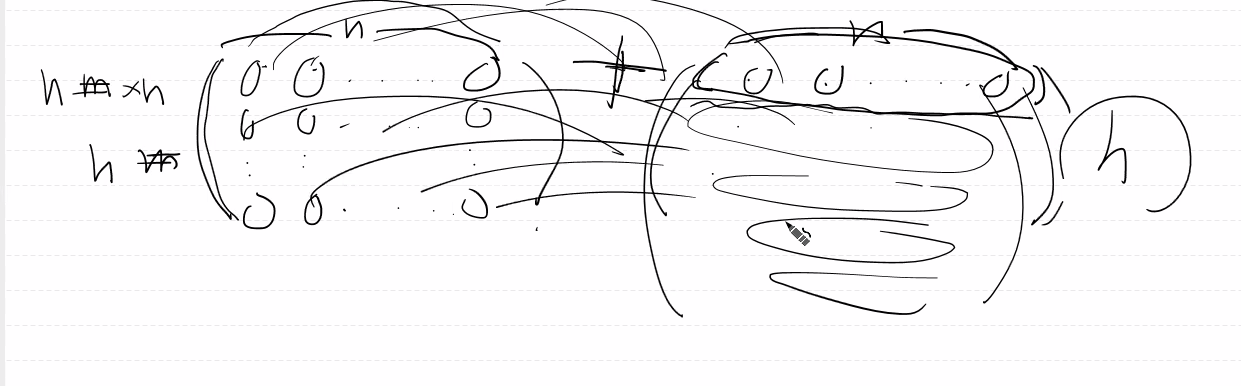


  - 출력층의 가중치 파라미터 $\partial W_{ij} = \frac {\partial E}{\partial w_{ij}}=y_i\delta _j$
$$
\partial W = X^T \Delta = \begin{bmatrix}x_{11}\quad x_{21}\quad \cdots \quad x_{h1}\\ x_{12}\quad x_{22}\quad \cdots \quad x_{h2}\\ \vdots\\ x_{1m}\quad x_{2m}\quad \cdots \quad x_{hm}\end{bmatrix} \cdot \begin{bmatrix}\delta_{11} \quad \delta_{12} \quad \cdots \quad \delta_{1n} \\ \delta_{21} \quad \delta_{22} \quad \cdots \quad \delta_{2n} \\ \vdots \\ \delta_{h1} \quad \delta_{h2} \quad \cdots \quad \delta_{hn} \end{bmatrix}
$$

  - 현재 층의 입력 기울기 $\partial y_i = \begin{aligned}\sum_{r=1}^n{\delta_rw_{jr}}\end{aligned}$

  - Question) 오차를 가중치로 미분한 식 $\partial W$은 mxn 행렬이고, E는 목표값에서 출력값과의 차를 의미하니까, hxn행렬인데. 그런데 이 E를 mxn행렬인 w로 미분하였는데 어째서 mxn행렬이 되나요?
  - Answer) 입력층과 출력층 사이에 가중치가 mxn 개이며 구하고자 한 것이 w의 각각의 기울기이기 때문에 mxn개로 나온다

### 코드로 구현하기

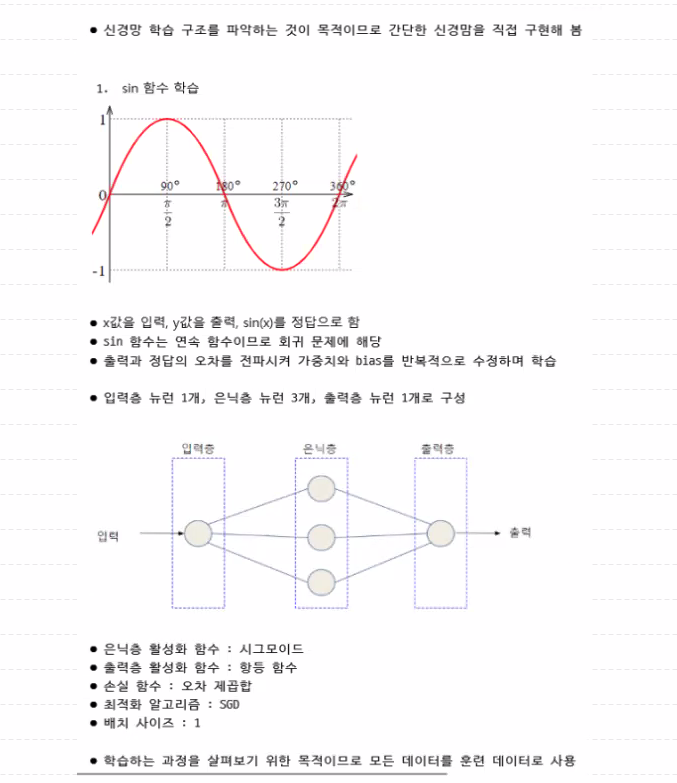

In [62]:
import numpy as np
import matplotlib.pyplot as plt

#-- 입력과 정답 준비--
input_data = np.arange(0,np.pi*2, 0.1) # 입력
correct_data = np.sin(input_data) #정답
input_data = (input_data - np.pi) / np.pi #입력을 -1.0 ~ 1.0 범위 안으로
n_data = len(correct_data) # 데이터 수

#-- 각 설정 --
n_in = 1 #입력층의 뉴런 수
n_mid = 5 #은닉층의 뉴런 수
n_out = 1 #출력층의 뉴런 수 

wb_width = 0.01 #가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1 #학습률
epoch = 2001 #전체를 돌린 횟수 (1부터 돌리기 때문에, 2000번 돌리기 위해 2001)
interval = 200# 경과 표시 간격

In [8]:
class MiddleLayer: #은닉층
    def __init__(self, n_upper, n): #초기설정
        self.w = wb_width * np.random.randn(n_upper, n) #가중치(행렬)
        self.b = wb_width * np.random.randn(n) # 편향(벡터)
        
    def forward(self, x):#순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u)) # 시그모이드 함수
    
    def backward(self, grad_y): #역전파, t는 target
        delta  = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): #가중치화 편향 수정 #eta는 학습률 
        self.w -= eta * self.grad_w 
        self.b -= eta * self.grad_b

In [12]:
class OutputLayer: # 출력층
    def __init__(self, n_upper, n): #초기설정
        self.w = wb_width * np.random.randn(n_upper, n) #가중치(행렬)
        self.b = wb_width * np.random.randn(n) # 편향(벡터)
        
    def forward(self, x):#순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u # 항등함수
    
    def backward(self, t): #역전파, t는 target
        delta  = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta): #가중치화 편향 수정 #eta는 학습률 
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        

  - np.random.randn(m,n) : 평균0, 표준편차 1의 표준정규분포 난수(ndarray(m,n))

In [4]:
np.random.randn(3, 2)

array([[ 0.7962091 , -0.7887732 ],
       [ 1.06638137, -0.1649306 ],
       [-1.57682329,  0.46396456]])

In [6]:
wb_width * np.random.randn(3, 2) # 표준편차 값을 통해, 값의 크기를 줄여줌 

array([[-0.01133407,  0.00017796],
       [-0.00598289,  0.00532106],
       [ 0.00832086, -0.00665912]])

In [63]:
# -- 각 층의 초기화 -- 
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

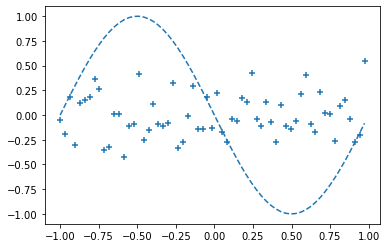

Epoch0/2001 Error:0.2898194613497465


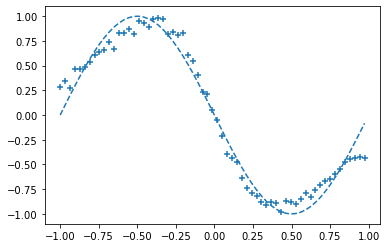

Epoch200/2001 Error:0.007233258699982839


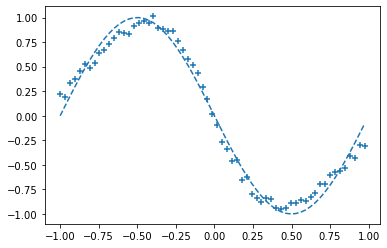

Epoch400/2001 Error:0.004317745412253394


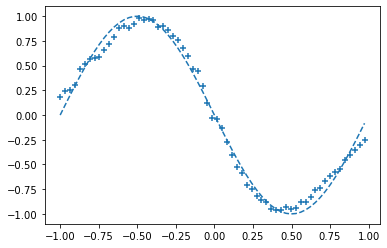

Epoch600/2001 Error:0.002866181985957124


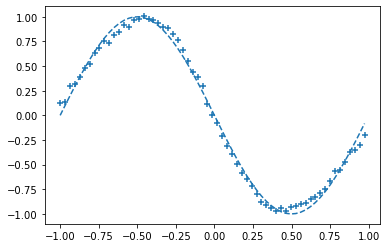

Epoch800/2001 Error:0.0016251744749985876


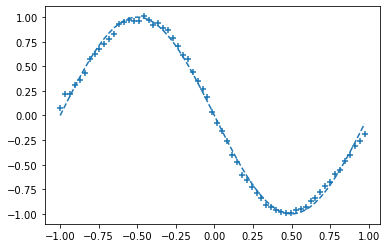

Epoch1000/2001 Error:0.0008514322643163903


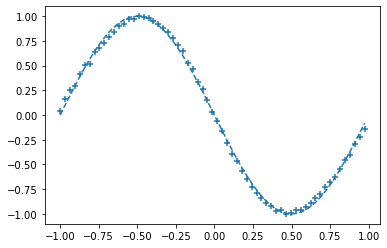

Epoch1200/2001 Error:0.00047790285355570034


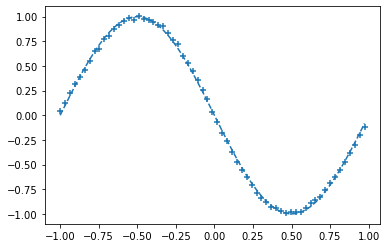

Epoch1400/2001 Error:0.0002195100301891987


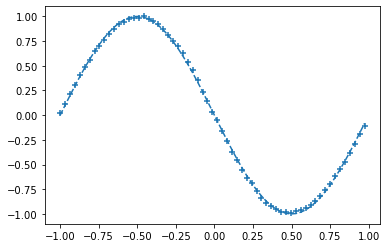

Epoch1600/2001 Error:0.00011840080421853781


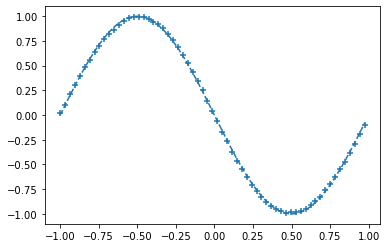

Epoch1800/2001 Error:6.972781193736584e-05


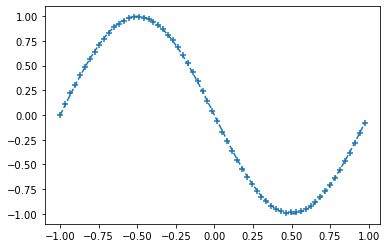

Epoch2000/2001 Error:4.0754137673511056e-05


In [64]:
# -- 학습  --
for i in range(epoch):

    #인덱스의 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random) #입력값의 순서를 변경하기.

    # 결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random :
        x = input_data[idx:idx+1]  # 입력
        t = correct_data[idx:idx+1]  # 정답
        
        # 순전파
        middle_layer.forward(x.reshape(1, 1))  # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y)  
        
        # 역전파
        output_layer.backward(t.reshape(1, 1))  # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)

        
        if i%interval == 0 :
        
            y = output_layer.y.reshape(-1) #행렬을 벡터로 되돌림

            #오차계산
            total_error += 1.0/2.0*np.sum(np.square(y-t)) #오차 제곱합

            #출력 기록
            plot_x.append(x)
            plot_y.append(y)
            
    
    if i%interval == 0:
        
        #출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker ="+")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch" + str(i) + "/" + str(epoch), "Error:"+str(total_error/n_data))

  - 은닉층의 개수를 변경해본 결과, 3개 이하의 경우에는 정확한 값을 찾기 어려웠고, 5개 이상의 경우에는 크게 차이가 없었다. 오히려 많이 늘릴 수록 좋지 않다 --> 과적합 (overfitting)

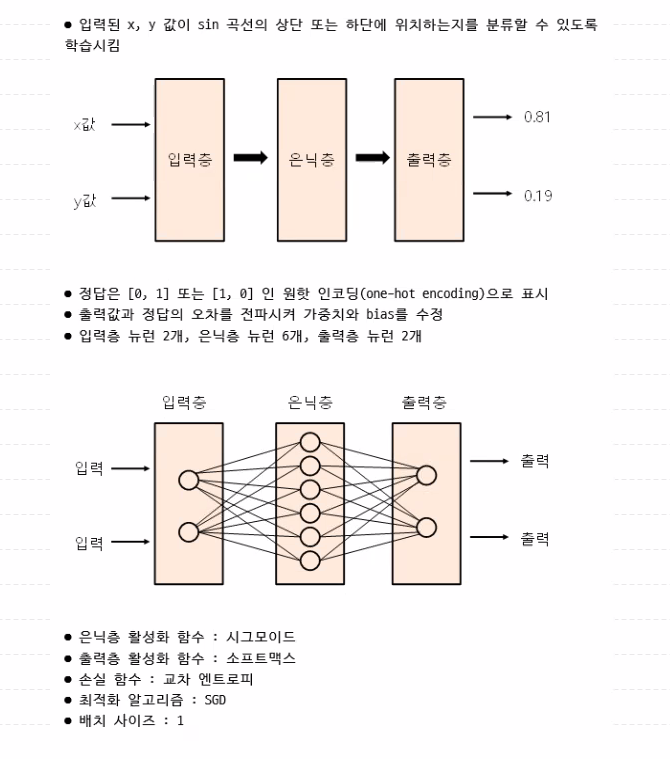

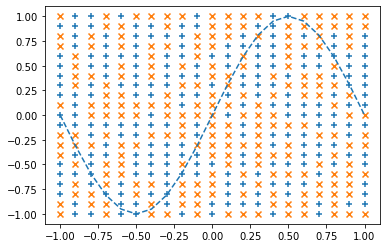

Epoch:0/101 Error:0.7159033907397456


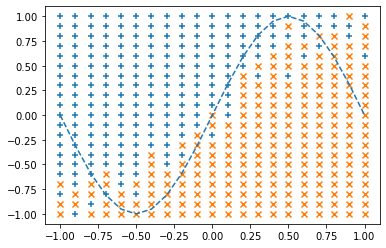

Epoch:10/101 Error:0.3236822066558953


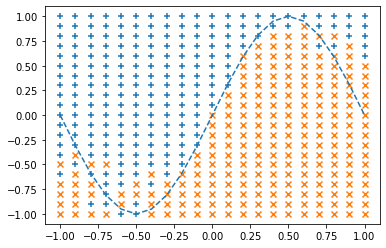

Epoch:20/101 Error:0.2208265969664357


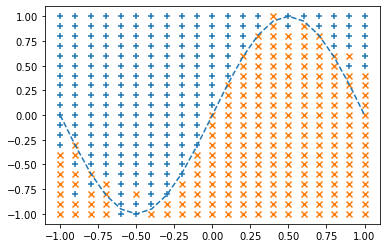

Epoch:30/101 Error:0.16146424623877145


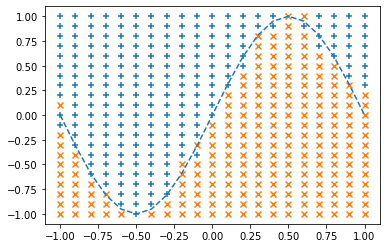

Epoch:40/101 Error:0.11619850029867719


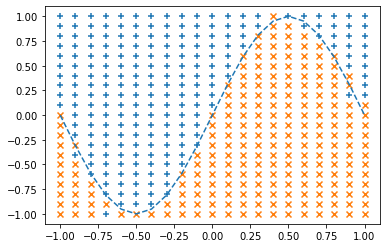

Epoch:50/101 Error:0.09143627048905781


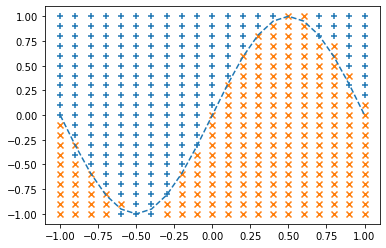

Epoch:60/101 Error:0.08711641425459755


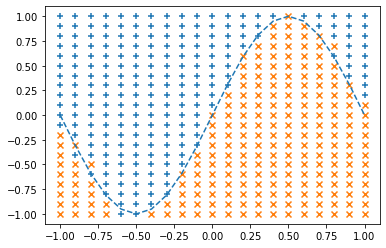

Epoch:70/101 Error:0.07217201344969511


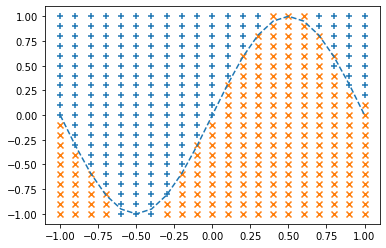

Epoch:80/101 Error:0.0718121218046604


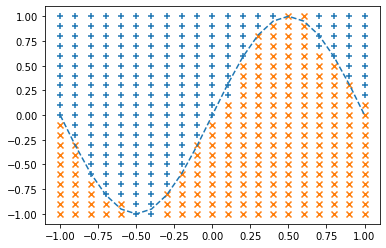

Epoch:90/101 Error:0.06971015281208424


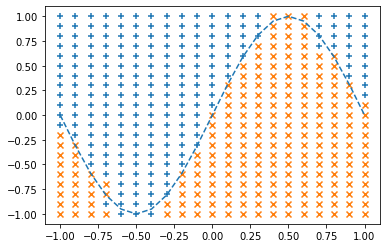

Epoch:100/101 Error:0.07068245005162506


In [95]:
import numpy as np
import matplotlib.pyplot as plt
#--값--
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)
#--입력, 정답 벡터 생성(one-hot encoding)--
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x, y])
        if y < np.sin(np.pi * x):  # y값이 sin 곡선 아래에 있으면
            correct_data.append([0, 1])  # 아래 영역
        else:
            correct_data.append([1, 0])  # 위 영역
n_data = len(correct_data)  # 데이터 수
input_data = np.array(input_data)
correct_data = np.array(correct_data)
# -- 각 설정 값 --
n_in = 2  # 입력층 뉴런 수
n_mid = 6  # 은닉층 뉴런 수
n_out = 2  # 출력층 뉴런 수
wb_width = 0.01  # 가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.1  # 학습률
epoch = 101
interval = 10  # 경과 표시 간격
# -- 은닉층 --
class MiddleLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치(행렬）
        self.b = wb_width * np.random.randn(n)  # 편향（벡터）
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # 시그모이드 함수
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T) 
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
# -- 출력층 --
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치（행렬）
        self.b = wb_width * np.random.randn(n)  # 편향（벡터）
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)  # 소프트맥스 함수
    def backward(self, t):
        delta = self.y - t
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        self.grad_x = np.dot(delta, self.w.T) 
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
# -- 각 층의 초기화 --
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)
# -- 학습 --
sin_data = np.sin(np.pi * X) # 결과 검증용
for i in range(epoch):
    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    # 결과 표시용
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for idx in index_random:
        x = input_data[idx]
        t = correct_data[idx]
        # 순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        # 역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        if i%interval == 0:
            y = output_layer.y.reshape(-1)  # 행렬을 벡터로 되돌림
            # 오차 계산
            total_error += - np.sum(t * np.log(y + 1e-7)) # 교차 엔트로피 오차
            # 확률 크기를 비교하여 분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
    if i%interval == 0:
        # 출력 그래프 표시
        plt.plot(X, sin_data, linestyle="dashed")
        plt.scatter(x_1, y_1, marker="+")
        plt.scatter(x_2, y_2, marker="x")
        plt.show()
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))

# 딥러닝
  - 정의 : 하나 이상의 '은닉층'을 포함하는 신경망으로 학습을 시키는 것. 
  - 바퀴수, 뉴런 개수 등의 개수는 언제 최적화라고 정해져있지 않다. 지속적으로 반복하면서 최적의 답을 찾는 것이 딥러닝 모델링이다.
  - Tensorflow : 지명도가 높은 딥러닝 프레임워크
    - 파일을 열고, 닫아주어야 하는 문제(boiler-plate code)_너무나 뻔하지만, 하지 않으면 안되는 것들
  - keras : 기존의 여러 Api를 큰 코드 변경없이 응용하기 위한 프로그램
    - boiler-plate code이 없어 사용이 편리하다.

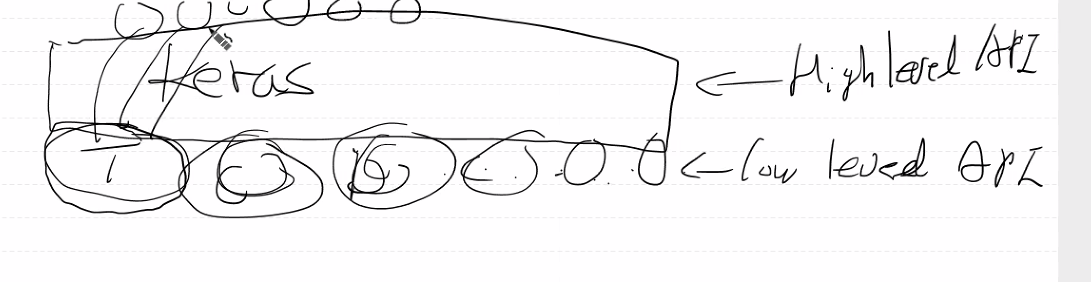

  - conda install tensorflow
  - conda install keras

### 폐암수술 환자의 생존율 예측하기

In [102]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3) #교육의 목적상 지정해둠.

# 불러온 데이터를 적용합니다.
Data_set = np.loadtxt("example/080228-master/deeplearning/dataset/ThoraricSurgery.csv", delimiter=",")

# 환자의 기록과 수술 결과를 X와 Y로 구분하여 저장합니다.
X = Data_set[:,0:17]
Y = Data_set[:,17]

# 딥러닝 구조를 결정합니다(모델을 설정하고 실행하는 부분입니다).
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu')) #keras에서 층 = Dense. input 17개로 30개의 뉴런으로 출력, activation 함수 relu 
# 가중치 파라미터 : 17 x 30 개 = 510개 / 바이어스 파라미터 : 30개
model.add(Dense(1, activation='sigmoid')) #출력 1개, sigmoid 함수
# 가중치 파라미터 : 30 x 1개 = 30개 / 바이어스 파라미터 : 1개
# 딥러닝을 실행합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




In [104]:
model.summary() # 1차 코드 가중치 파라미터 + bias 파라미터 : 17개 x 30개 + 바이어스 30개 / # 2차 코드 가중치 파라미터 + bias 파라미터 : 30개 *1개 + 1개

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                540       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


#### 파라미터
1차 - 입력 17개, 출력 30개인 분석 모델
$$
\begin{pmatrix}x_1 \quad \cdots \quad x_{17}\end{pmatrix}\begin{pmatrix}w_{1-1} \quad \cdots \quad w_{1-30} \\w_{2-1} \quad \cdots \quad w_{2-30}\\ \vdots \\ w_{1-71} \quad \cdots \quad w_{17-30} \end{pmatrix} \quad + \quad \begin{pmatrix}b_1 \quad \cdots \quad b_{30}\end{pmatrix} = \begin{pmatrix}y_1 \quad \cdots \quad y_{30}\end{pmatrix}
$$

2차 - 입력 30개, 출력 1개의 분석 모델
$$
\begin{pmatrix}x_1 \quad \cdots \quad x_{30}\end{pmatrix}\begin{pmatrix}w_{1}\\ w_{2}\\ w_{3}\\ \vdots \\ w_{30}\end{pmatrix} \quad + \quad \begin{pmatrix}b\end{pmatrix} = \begin{pmatrix}y\end{pmatrix}
$$

In [105]:
model.fit(X, Y, epochs=100, batch_size=10) #10개씩 잡아서 실행

Epoch 1/100
47/47 [==============================] - 0s 1ms/step - loss: 0.6482 - accuracy: 0.8128
Epoch 2/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4890 - accuracy: 0.8468
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8511
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.8489
Epoch 5/100
47/47 [==============================] - ETA: 0s - loss: 0.4624 - accuracy: 0.84 - 0s 1ms/step - loss: 0.4430 - accuracy: 0.8532
Epoch 6/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8532
Epoch 7/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8511
Epoch 8/100
47/47 [==============================] - 0s 980us/step - loss: 0.4363 - accuracy: 0.8489
Epoch 9/100
47/47 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8489
Epoch 10/100
47/47 [==============================] - 0s 1ms/step

  - 참조 : 모두의 딥러닝 개정 2판

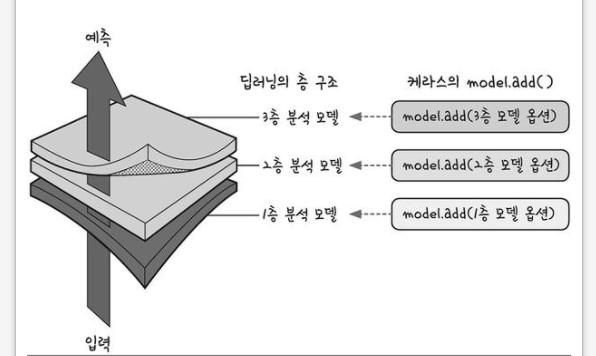

### 피마 인디언의 당뇨병 여부 확인하기

In [106]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불러온 데이터셋을 적용합니다. 이 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv("example/080228-master/deeplearning/dataset/pima-indians-diabetes.csv",
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [107]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [108]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [109]:
print(df.describe())

         pregnant      plasma    pressure   thickness     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [110]:
print(df[['plasma', 'class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]


In [113]:
#임신과 당뇨의 상관관계
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


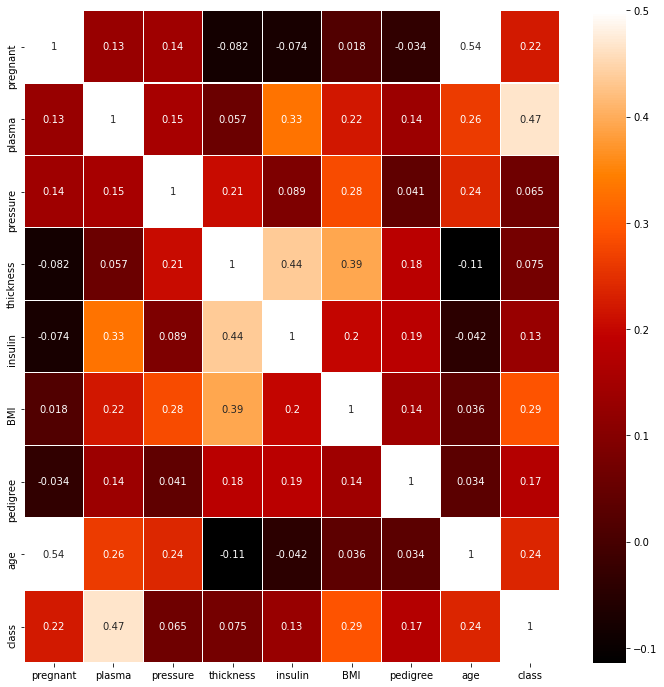

In [114]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

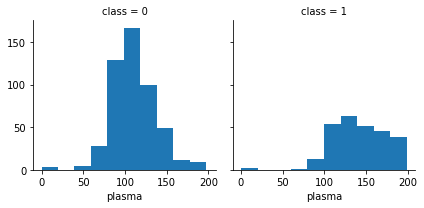

In [115]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

In [119]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt('example/080228-master/deeplearning/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [120]:
# 1층 모델 : 가중치 파라미터 8*12 = 96개/ 바이오스 파라미터 12 개, 합 = 108개
# 2층 모델 : 가중치 파라미터 12*8 = 96개/ 바이오스 파라미터 8 개, 합 =  104개
# 3층 모델 : 가중치 파라미터 8*1 = 8개/ 바이오스 파라미터 1 개, 합 = 9개
# 3개의 모델 총 108 + 104 + 9 = 221개
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [121]:
# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 0s 997us/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 992us/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 2ms/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 963us/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6758
Ep

77/77 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7643
Epoch 164/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7643
Epoch 165/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7526
Epoch 166/200
77/77 [==============================] - 0s 814us/step - loss: 0.4726 - accuracy: 0.7734
Epoch 167/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7695
Epoch 168/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4768 - accuracy: 0.7643
Epoch 169/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4706 - accuracy: 0.7643
Epoch 170/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7656
Epoch 171/200
77/77 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7630
Epoch 172/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4719 - accuracy: 0.7656
Ep

  - 참조 : 모두의 딥러닝 개정 2판

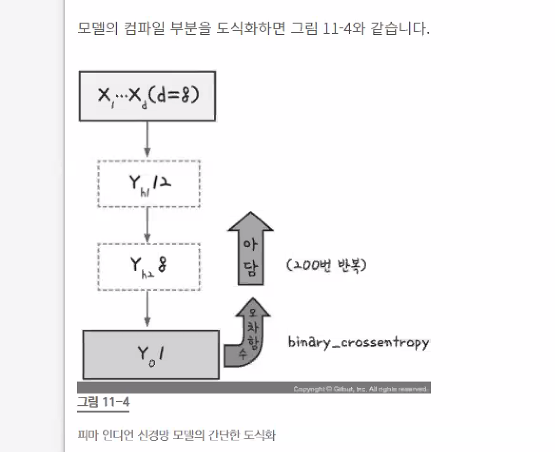

### 다중 분류 문제 해결하기

In [152]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

# 불러온 데이터를 적용합니다. 
df = pd.read_csv('example/080228-master/deeplearning/dataset/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
print(df.head(5))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


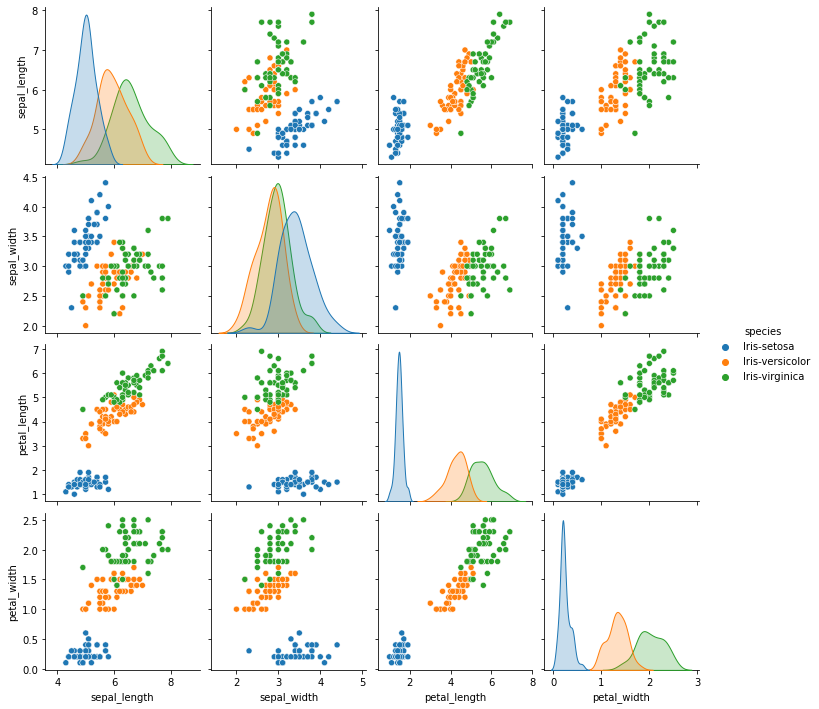

In [153]:

# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

In [154]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

In [155]:
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y) #  Iris-setosa, Iris-versicolor, Iris-virginica을 숫자로 변경

In [156]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [157]:
import tensorflow as tf
 
Y_encoded = tf.keras.utils.to_categorical(Y) #숫자로 변경한 꽃의 종류들을 활성화 함수를 적용하기 위해 0과 1로 바꾸어 준다.

In [158]:
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.python.keras.callbacks import TensorBoard #tensorboard 이용하기
from time import time

# 모델의 설정
model = Sequential()
model.add(Dense(16,  input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [160]:
# 1층 모델 : 가중치 파라미터 4*16 = 64개/ 바이오스 파라미터 16 개, 합 = 80개
# 2층 모델 : 가중치 파라미터 16*3 = 48개/ 바이오스 파라미터 3 개, 합 =  51개
# 3개의 모델 총 80+51 = 131개
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [161]:
tensorboard = TensorBoard(log_dir="logs\{}".format(time()))

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1, callbacks=[tensorboard])

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 0s 3ms/step - loss: 1.3259 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.8409 - accuracy: 0.6333
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7110 - accuracy: 0.7267
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6229 - accuracy: 0.6867
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5542 - accuracy: 0.7933
Epoch 6/50
150/150 [==============================] - 0s 968us/step - loss: 0.4988 - accuracy: 0.9067
Epoch 7/50
150/150 [==============================] - 0s 807us/step - loss: 0.4562 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.9067
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.9267
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.

In [162]:
print("\n Loss: %.4f" % (model.evaluate(X, Y_encoded)[0]))

5/5 [==============================] - 0s 2ms/step - loss: 0.1024 - accuracy: 0.9733

 Loss: 0.1024


#### 텐서보드로 열어보기 
  -  conda -> 가상환경 -> notebook 위치에 가서 열기 -> tensorboard --logdir=logs
  -  http://localhost:6006/